# Single Machine Infinite Bus Systen

The model of Single-machine Infinite Bus in the full version is given as follow:
\begin{align}
    \frac{d\delta}{dt} & = \omega - \omega_s \\
    \frac{d(\omega - \omega_s)}{dt} & = K_1 - K_2\sin(\delta) - K_3(\omega - \omega_s), \\
    \text{with} ~~ K_1 = \frac{\omega_s}{2C}T^0_M, & K_2 = \frac{\omega_s}{2C}\frac{E_cV}{X}, K_3 = \frac{\omega_s}{2C}D,
\end{align}

In [2]:
# Import package.
using QuDiffEq               # package containt quantum computing' solvers.
using OrdinaryDiffEq         # package containt solvers to solve ODEs.
using DifferentialEquations  # package containt solvers to solve differential equations.
using Plots                  # package to plot the figure.
using LaTeXStrings           # oackage to type LaTex in the Julia

#Define the ODEs for Single Machine Infinite Bus system with u[1] is the phase angle,
#and u[2] is the speed of synchronous machine.
function SIMB(du,u,p,t)
    du[1] = u[2]
    du[2] = 5- 10*sin(u[1])-1.7*u[2]
    end

SIMB (generic function with 1 method)

## Normal operation

#### Define the ODE system

In [3]:
u0 = [-1.0,7.0]
h = 0.01
k = 16
tspan = (0.0,20.0)
prob = ODEProblem(SIMB,u0,tspan);

#### Solving system

In [4]:
# quantum ODE
qsol = solve(prob,QuNLDE(k,0.001),dt = h, adaptive=false) # this is Quantum for ODE
qsol = transpose(qsol);

# Classical ODE
sol = solve(prob,Trapezoid(),dt = h, adaptive = false) # this is regular ODE
sol = transpose(sol);

#### Save the results.

In [5]:
#Saving the results
using DataFrames
using CSV
df = DataFrame(delta_quan = qsol[:,1], omega_quan = qsol[:,2], delta_ODE = sol[:,1], omega_ODE=sol[:,2]);
CSV.write("results/one machine/SMIB.csv", df; append = false)

#### Plot the results.

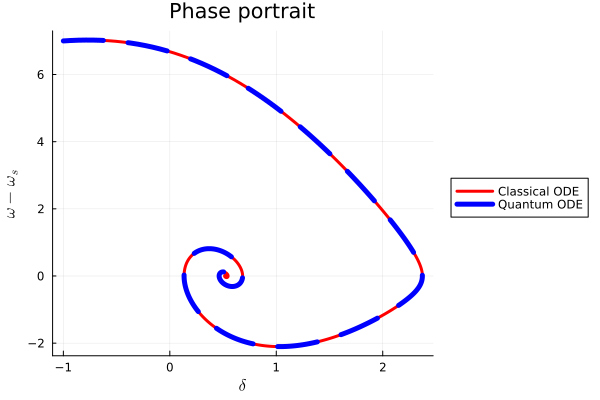

In [6]:
# Plot the data with the legend outside
p = plot(sol[:,1], sol[:,2], title = "Phase portrait", label = "Classical ODE", lc = :red, ls = :solid, lw = 3, legend=:outerright)
plot!(qsol[:,1], qsol[:,2], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)

# Set labels
xlabel!(L"\delta")
ylabel!(L"\omega - \omega_s")

# Display the plot
p

## Pole slipping

#### Modified the system for pole slipping

In [7]:
function SIMB(du,u,p,t)
    du[1] = u[2]
    du[2] = 5- 10*sin(u[1])-1.3*u[2]
    end
u0 = [-1.0,7.0]
prob = ODEProblem(SIMB,u0,tspan);

#### Solving system

In [8]:
# quantum ODE
qsol = solve(prob,QuNLDE(k,0.001),dt = 0.01,adaptive=false) # this is Quantum for ODE
qsol = transpose(qsol);

# classical ODE
sol = solve(prob,Trapezoid(),dt = 0.01,adaptive = false) # this is regular ODE
sol = transpose(sol);

#### Save the results

In [9]:
#Saving the results
using DataFrames
using CSV
df = DataFrame(delta_quan = qsol[:,1], omega_quan = qsol[:,2], delta_ODE = sol[:,1], omega_ODE=sol[:,2]);
CSV.write("results/one machine/SMIB_large.csv", df; append = false)

#### Plot the results.

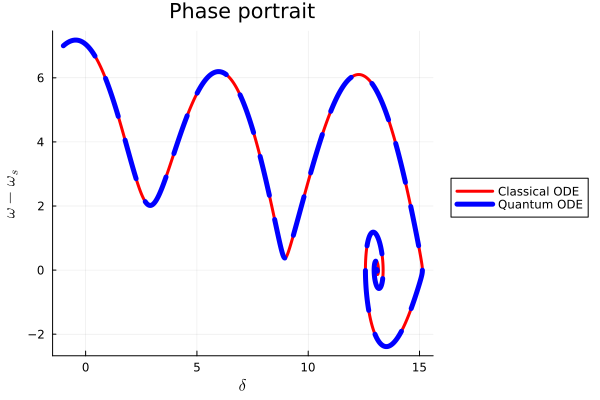

In [10]:
# Plot the data with the legend outside
p = plot(sol[:,1], sol[:,2], title = "Phase portrait", label = "Classical ODE", lc = :red, ls = :solid, lw = 3, legend=:outerright)
plot!(qsol[:,1], qsol[:,2], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)

# Set labels
xlabel!(L"\delta")
ylabel!(L"\omega - \omega_s")

# Display the plot
p